# Class 01: Introduction to Clustering Algorithms
**Author**: Mohammed A. Shehab

**Purpose**: This notebook demonstrates and compares three clustering algorithms—DBSCAN, K-Means, and Hierarchical Agglomerative Clustering—on a synthetic dataset.  

---

## Overview:
1. **Clustering Algorithms**: Understand and apply clustering algorithms to a dataset.
2. **Synthetic Data**: Use the two-moons dataset for visualization and comparison.
3. **Algorithms Covered**:
   - **DBSCAN**: Density-based clustering.
   - **K-Means**: Centroid-based clustering.
   - **Hierarchical Agglomerative Clustering (HAC)**: Linkage-based clustering.

---

### Notebook Metadata

- **Prerequisites**:
  - Basic Python programming.
  - Familiarity with NumPy, Matplotlib, and machine learning concepts.
- **Learning Objectives**:
  - Understand different clustering algorithms.
  - Recognize the strengths and limitations of each technique.
  - Visualize and interpret clustering results effectively.


### Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons # load the dataset from library

### Generate Synthetic Dataset

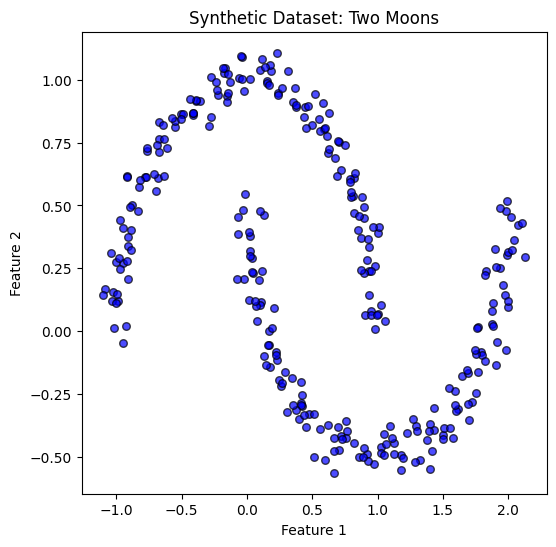

In [2]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualize the raw dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, c='blue', edgecolor='k', alpha=0.7)
plt.title("Synthetic Dataset: Two Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Apply Clustering Algorithms

In [3]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Hierarchical Agglomerative Clustering (HAC)
hac = AgglomerativeClustering(n_clusters=2)
hac_labels = hac.fit_predict(X)

C:\Users\Shehab\.conda\envs\MLCourse\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualize the Results

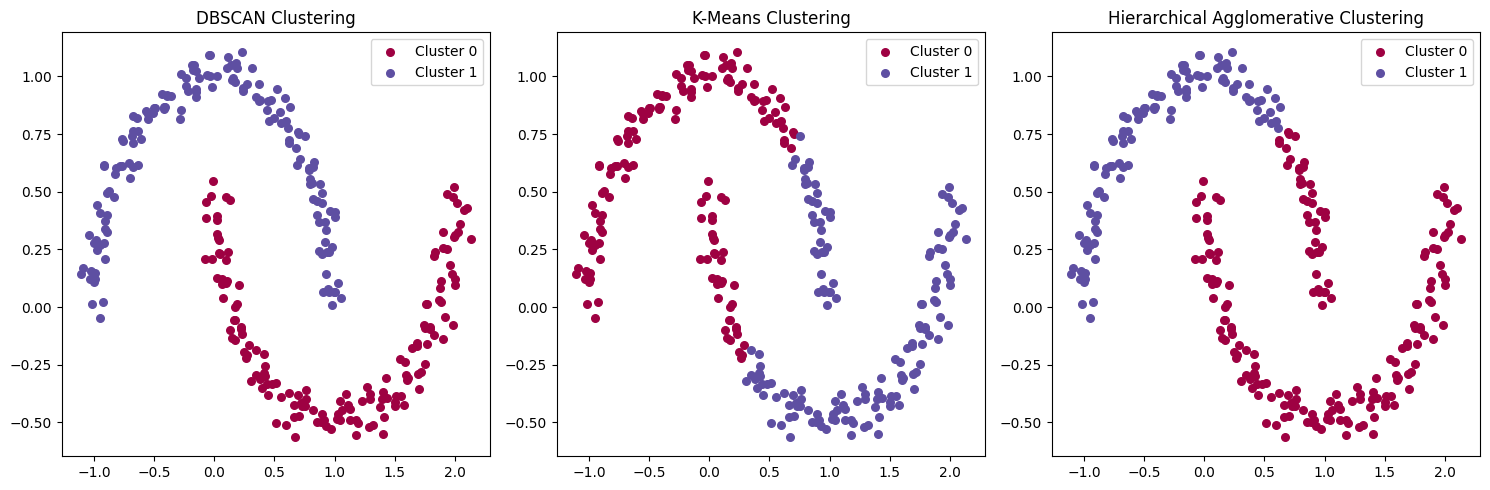

In [4]:
# Create subplots for clustering results
plt.figure(figsize=(15, 5))

# Plot DBSCAN Results
plt.subplot(131)
unique_labels_dbscan = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

for label, color in zip(unique_labels_dbscan, colors):
    if label == -1:
        # Noise points
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color='gray', s=10, label='Noise')
    else:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')
plt.title('DBSCAN Clustering')
plt.legend()

# Plot K-Means Results
plt.subplot(132)
unique_labels_kmeans = np.unique(kmeans_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_kmeans)))

for label, color in zip(unique_labels_kmeans, colors):
    plt.scatter(X[kmeans_labels == label][:, 0], X[kmeans_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')
plt.title('K-Means Clustering')
plt.legend()

# Plot HAC Results
plt.subplot(133)
unique_labels_hac = np.unique(hac_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_hac)))

for label, color in zip(unique_labels_hac, colors):
    plt.scatter(X[hac_labels == label][:, 0], X[hac_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')
plt.title('Hierarchical Agglomerative Clustering')
plt.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

## Discussion and Key Takeaways

- **DBSCAN**:
  - Suitable for non-linear cluster shapes.
  - Identifies noise points (label `-1`).
  - Requires careful tuning of `eps` and `min_samples`.

- **K-Means**:
  - Assumes clusters are spherical.
  - Sensitive to initialization and outliers.

- **Hierarchical Agglomerative Clustering (HAC)**:
  - Builds a hierarchy of clusters.
  - Flexible depending on linkage criteria but computationally expensive for large datasets.
